In [6]:
from widgets.data import Data
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as si

def get_indices_range(x, start_value, end_value):
    start_index = np.argmin(np.absolute(x - start_value))
    end_index = np.argmin(np.absolute(x - end_value))
    return np.r_[start_index:end_index]

def get_indices_to_fit(x, ranges_to_ignore):
    union = reduce(np.union1d, (get_indices_range(x, *i) for i in ranges_to_ignore))
    to_fit = np.in1d(np.arange(x.shape[0]), union, invert=True)
    return to_fit

# Normalization on water spectrum

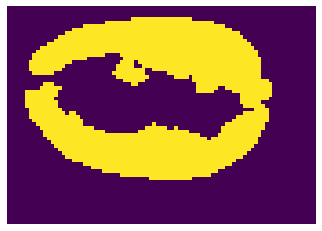

[[ 0  0  0 ... 84 84 84]
 [ 0  1  2 ... 57 58 59]]



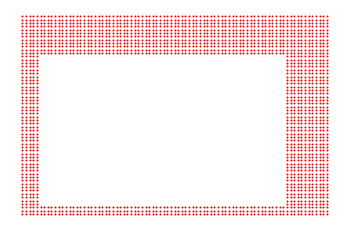

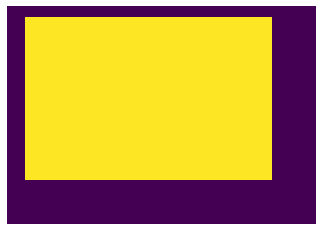

In [72]:
from sklearn import cluster

cell = "Cryptomonas" # "Bigelowiella" "Cryptomonas" "Penium" "a"
data = Data(f"./data/{cell}.mat")

n_comp = 2
clf = cluster.MiniBatchKMeans(n_clusters=n_comp, random_state=2, max_iter=100)
# cluster based on C-H band
flattened_data = np.reshape(data.data, (-1, data.data.shape[-1]))[:,get_indices_range(data.x_axis, 2750, 3050)]
clf.fit(flattened_data)
result = clf.predict(flattened_data)

comp_im = np.reshape(result, data.data.shape[:2])
water_component = int(np.round(np.mean(np.concatenate((comp_im[:,0], comp_im[:, -1], comp_im[-1, :], comp_im[0, :])))))
# let the water component be 0
if water_component == 1:
    comp_im = np.ones(comp_im.shape) - comp_im

plt.imshow(comp_im.T, interpolation='nearest', zorder=1)
plt.axis('off')
plt.show()

no_water_rows = np.argwhere(np.max(comp_im, axis=0) > 0)
no_water_cols = np.argwhere(np.max(comp_im, axis=1) > 0)

inner_points = comp_im[no_water_cols[0][0]:no_water_cols[-1][0] + 1, no_water_rows[0][0]:no_water_rows[-1][0] + 1]
comp_im[no_water_cols[0][0]:no_water_cols[-1][0] + 1, no_water_rows[0][0]:no_water_rows[-1][0] + 1] = 1
outer_points = np.vstack(np.where(comp_im == 0))
print(outer_points)
print()
#plt.imshow(comp_im.T, interpolation='nearest', zorder=1)
plt.scatter(*outer_points, color="r", zorder=2, s=1)
plt.axis('off')
plt.show()

plt.imshow(comp_im.T, interpolation='nearest', zorder=1)
plt.axis('off')
plt.show()
